### Conditional Heteroskedasticity

Understand the heteroskedasticity in financial markets and learn advanced time series volatility analysis methods

#### 1. Stationarity and Heteroskedasticity

**1.1 Stationarity**

The basic assumptions of the AR process are as follows:

- Strict stationarity
    - For any natural numbers $t_1, t_2, \cdots, t_n$ and natural number k, if the joint probability density function of n random variables is identical to the joint probability density function when the time axis is shifted by k for these n random variables, then the time series has strict stationarity
    - Therefore, if a stochastic process satisfies the strict stationarity condition, it must show that the joint probability density function remains the same for all n regardless of time shifts, meaning the distribution must always be the same at any time point

- Weak stationarity
    - If a stochastic process has finite second moment, with constant mean and variance independent of time point t, and autocovariance depends on lag k rather than time point t, then it has weak stationarity
    - $\mathrm{E}(Z_t) = \mu,~~ \mu \in \mathbf{R}$
    - $\mathrm{Var}(Z_t) = \sigma ^ 2, ~~ \sigma ^ 2 \in \mathbf{R}$
    - $\mathrm{Cov}(Z_t, Z_{t+k}) = \sigma_K, ~~\mathrm{for~any~t,h \geq 1}$

If financial data (usually meaning first-differenced data here) is weakly stationary, then both its squared values and absolute values should also satisfy the weak stationarity assumption. However, in reality, when transformations are applied to the data, asset prices do not exhibit weak stationarity

In [32]:
import numpy as np
import pandas as pd
import yfinance as yf

start_date = '2018-01-01'
data = yf.download(
    '^GSPC',
    start = start_date,
    interval = '1wk',
    progress = False
)

In [33]:
ret = data['Close'].pct_change().dropna()
ret.head()

Date
2018-01-08    0.015708
2018-01-15    0.008635
2018-01-22    0.022265
2018-01-29   -0.038547
2018-02-05   -0.051620
Name: Close, dtype: float64

To demonstrate whether the weak stationarity assumption is satisfied, we generate new asset price time series as follows

In [34]:
ret_square = ret ** 2
ret_abs = np.abs(ret)

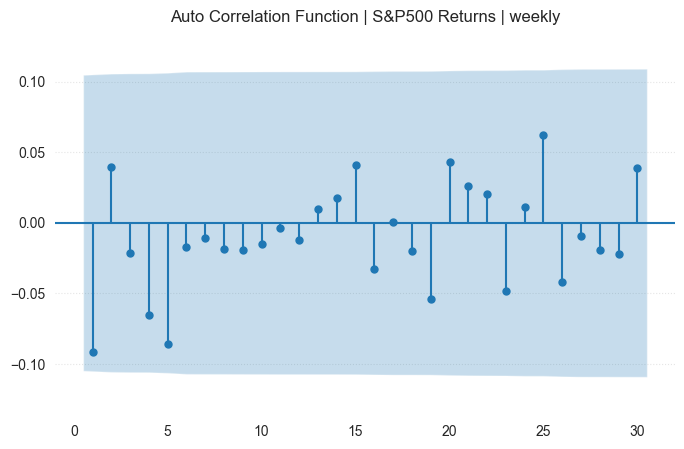

In [35]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(8, 5))
plot_acf(ret, auto_ylims = True, lags = range(1, 31), ax = ax)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls=':', alpha=0.5)
plt.title(r'Auto Correlation Function | S&P500 Returns | weekly')
plt.show()

For the first-differenced return vector, we can see that it exhibits stationarity as shown above

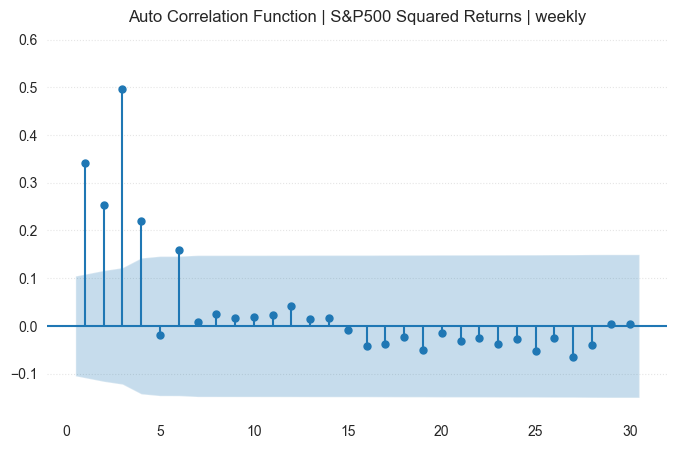

In [36]:
fig, ax = plt.subplots(figsize=(8, 5))
plot_acf(ret_square, auto_ylims = True, lags = range(1, 31), ax = ax)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls=':', alpha=0.5)
plt.title(r'Auto Correlation Function | S&P500 Squared Returns | weekly')
plt.show()

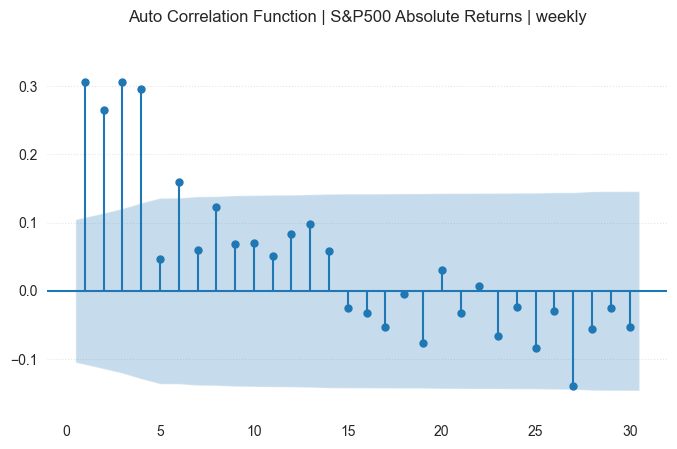

In [37]:
fig, ax = plt.subplots(figsize=(8, 5))
plot_acf(ret_abs, auto_ylims = True, lags = range(1, 31), ax = ax)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls=':', alpha=0.5)
plt.title(r'Auto Correlation Function | S&P500 Absolute Returns | weekly')
plt.show()

However, neither the squared returns nor the absolute returns are stationary. Therefore, we can see that most financial time series data does not satisfy the IID assumption.

This is why we need to consider heteroscedasticity in financial time series data

### 1.2 Characteristics of Volatility

The special characteristic of stock volatility is that it cannot be directly observed. However, while volatility cannot be directly observed, it has several common features that can be seen in asset returns:

1. Volatility clustering exists. That is, volatility may be high during certain periods and low during others
2. Volatility evolves over time in a persistent manner. In other words, volatility jumps are rare
3. Volatility does not diverge to infinity. That is, volatility fluctuates within a certain range. Statistically speaking, this means volatility is often stationary
4. Volatility appears to respond differently to large price increases or decreases, known as the leverage effect. These properties play an important role in the development of volatility models

Some volatility models fail to capture the aforementioned characteristics and were specifically proposed to compensate for the weaknesses of existing models. For example, the EGARCH model was developed to capture the asymmetry in volatility induced by large positive and negative asset returns


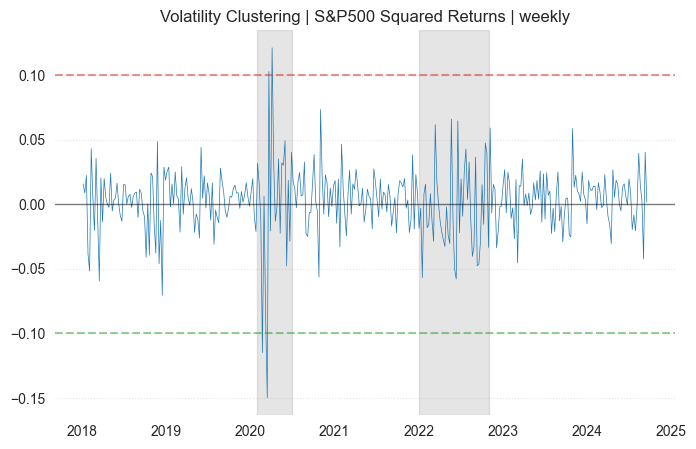

In [38]:
fig, ax = plt.subplots(figsize=(8, 5))
plt.plot(ret, lw = 0.5)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.axhline(0, color = 'black', alpha = 0.5, lw = 1)
ax.axhline(0.1, color = 'tab:red', linestyle = '--', alpha = 0.5)
ax.axhline(-0.1, color = 'tab:green', linestyle = '--', alpha = 0.5)
ax.axvspan('2020-02-01', '2020-06-30', color = 'gray', alpha = 0.2)
ax.axvspan('2022-01-01', '2022-10-31', color = 'gray', alpha = 0.2)
ax.yaxis.grid(True, ls=':', alpha=0.5)
plt.title(r'Volatility Clustering | S&P500 Squared Returns | weekly')
plt.show()

As shown in the graph above, we can observe the **volatility clustering** phenomenon where periods of high volatility tend to persist for some time. We can also see that the volatility oscillates within a relatively stable range without diverging to infinity.
End of Selection

### The ARCH model is defined by:

$$r_t = \mu_t + a_t$$

$$a_t = \sigma_t \epsilon_t$$

$$\sigma_t^2 = \alpha_0 + \alpha_1 a_{t-1}^2 + \alpha_2 a_{t-2}^2 + \cdots + \alpha_m a_{t-m}^2$$

where:
- $r_t$ is the return at time t
- $\mu_t$ is the conditional mean
- $a_t$ is the residual
- $\sigma_t$ is the conditional standard deviation
- $\epsilon_t$ is white noise with mean 0 and variance 1
- $\alpha_0 > 0$ is a positive constant
- $\alpha_i \geq 0$ for i = 1,2,...,m
- m is the ARCH order

The **Autoregressive Conditional Heteroskedasticity (ARCH)** model, introduced by Robert F. Engle, is widely used in econometrics and financial modeling to capture and forecast time-varying volatility in time series data.

### Purpose of ARCH
The ARCH model captures volatility clustering, a phenomenon where large changes in a time series are followed by large changes (of either sign), and small changes are followed by small changes.

### Formula and Explanation

#### 1. The Model Setup:
The time series $ y_t $ is defined as:
$$ y_t = \mu_t + \epsilon_t $$
Where:
- $ y_t $: The observed value of the series at time $ t $,
- $ \mu_t $: The conditional mean (often assumed constant or modeled using an AR or other deterministic structure),
- $ \epsilon_t $: The residual or innovation term.

The residual $ \epsilon_t $ is modeled as:
$$ \epsilon_t = \sigma_t z_t $$
Where:
- $ \sigma_t^2 $: The conditional variance at time $ t $,
- $ z_t $: A white noise process ($ z_t \sim N(0,1) $).

#### 2. Conditional Variance:
The defining feature of the ARCH model is the modeling of $ \sigma_t^2 $ (the conditional variance):
$$ \sigma_t^2 = \alpha_0 + \sum_{i=1}^q \alpha_i \epsilon_{t-i}^2 $$
Where:
- $ \alpha_0 > 0 $: Constant term ensuring positive variance,
- $ \alpha_i \geq 0 $: Coefficients capturing the influence of past squared residuals on current variance,
- $ \epsilon_{t-i}^2 $: Squared residuals from $ i $ previous time steps,
- $ q $: The order of the ARCH model.

This formula reflects how past errors influence current volatility:
- When past errors are large, $ \epsilon_{t-i}^2 $ increases $ \sigma_t^2 $, leading to higher volatility.

### ARCH(1) Model Example
For $ q = 1 $, the ARCH(1) model becomes:
$$ \sigma_t^2 = \alpha_0 + \alpha_1 \epsilon_{t-1}^2 $$

#### Interpretation:
- $ \sigma_t^2 $ depends on a constant ($ \alpha_0 $) and the square of the most recent residual ($ \epsilon_{t-1}^2 $).
- Large shocks in the past ($ \epsilon_{t-1}^2 $) imply high volatility ($ \sigma_t^2 $) in the current period.

### Generalization: GARCH Model
The ARCH model can be generalized into the **Generalized ARCH (GARCH)** model, which includes lagged values of $ \sigma_t^2 $:
$$ \sigma_t^2 = \alpha_0 + \sum_{i=1}^q \alpha_i \epsilon_{t-i}^2 + \sum_{j=1}^p \beta_j \sigma_{t-j}^2 $$
Here:
- $ p $: The number of lagged variance terms,
- $ \beta_j $: Coefficients capturing the persistence of volatility over time.

This structure makes GARCH models more parsimonious and efficient than high-order ARCH models.


#### 2. Model Building

To properly explain volatility models from an appropriate perspective, it is beneficial to consider the conditional mean and variance of $r_t$ given $F_{t-1}$.

$$μ_t = E(r_t|F_{t−1}), \quad σ_t^2 = \mathrm{Var}(r_t|F_{t−1})=E[(r_t −μ_t)^2|F_{t−1}]$$

Here, $F_{t-1}$ represents the set of all available information at time $t-1$. The information we can obtain from this does not include information asymmetry or inefficient markets.

To estimate the $\mathrm{ARCH}$ model, we assume that $r_t$ is a model of a constant term plus error in the long run.

$$r_t = μ_t + a_t, \quad μ_t = \sum_{i=1}^p \phi_i y_{t-i} + a_t - \sum_{i=1}^q \theta_i a_{t-i}, \quad y_t = r_t - \phi_0 - \sum_{i=1}^k β_i x_{it}$$

Here, $y_t$ simply represents an adjusted random time series after removing the effects of explanatory variables. From the above two equations, we can show that:

$$\sigma_t^2 = \mathrm{Var}(r_t|F_{t-1}) = \mathrm{Var}(a_t |F_{t-1})$$

Conditional heteroscedasticity models can be largely divided into two types: one that expresses the variation of $\sigma_t^2$ as a function, and another that interprets the variation of $\sigma_t^2$ as a stochastic equation. The $\mathrm{ARCH}$ model belongs to the former, while the $\mathrm{SV model}$ belongs to the latter.




### Test ARCH Effect

To build a volatility model, the following process is required:

1. Test for serial dependence in the data and, if necessary, construct an econometric model for the return series to specify the mean equation to remove linear dependence
2. Use the residuals from the mean equation to test for ARCH effects
3. If the ARCH effect is statistically significant, specify a volatility model. Then estimate the mean and volatility equations
4. Check the fitted model and verify again if necessary

Let's assume $a_t = r_t - \mu_t$. The squared $a_t^2$ is used to check for conditional heteroscedasticity known as the ARCH effect. $a_t^2$ can be expanded as follows:

$$a_t^2 = \alpha_0 + \alpha_1a_{t-1}^2 + \cdots + \alpha_m a_{t-m}^2 + e_t, ~~~~~ t=m+1, \cdots, T$$

Here, $e_t$ represents the error term, and $m$ represents the period. To estimate the effect of conditional heteroscedasticity, we set the null hypothesis as follows:

$$H_0 : \alpha_1 = \cdots = \alpha_m = 0$$

Interpreting this hypothesis, it means that the autocorrelation coefficients of past values for $a_t^2$ are zero, indicating no ARCH effect. $\mathrm{SSR_0} = \sum_{t=m+1}^T (a_t^2 - \bar \omega)^2$, and $\bar \omega = \frac{1}{T}\sum_{t=1}^T a_t^2$. The sample mean is $a_t^2$ and $\mathrm{SSR_1} = \sum_{t=m+1}^T \hat e_t^2$. $\hat e_t^2$ can be obtained through least squares residual estimation. Then we obtain the following statistic:

$$F = \frac{\mathrm{SSR_0 - SSR_1} / m}{\mathrm{SSR_1} / (T - 2m - 1)}$$

This statistic follows a $\Chi ^2$ distribution

#### 3. ARCH model

The $\text{ARCH}$ model is estimated as follows:

$$a_t = \sigma_t \epsilon_t, ~~~~~ \sigma_t^2 = \alpha_0 + \alpha_1 a_{t-1}^2 + \cdots + \alpha_ma_{t-m}^2$$

Here, $\{\epsilon_t\}$ is a sequence of IID random variables with mean 0 and variance 1 ($\alpha_0 > 0, \alpha_i \geq 0$ when $i>0$). Interpreting this model, the current shock is influenced by previous shocks. In other words, it attempts to explain the clustering phenomenon of volatility. To understand the $\mathrm{ARCH}$ model, we should first examine the $\mathrm{ARCH}(1)$ model:

$$a_t = \sigma_t \epsilon_t,~~~~~ \sigma_t^2 = \alpha_0 + \alpha_1 a_{t-1}^2$$

Here, $\alpha_0 > 0, \alpha_1 \geq 0$. First, we set the unconditional mean of $a_t$ to 0:

$$E(a_t) = E[E(a_t|F_{t-1})] = E[\sigma_t E(\epsilon_t)] = 0$$

The unconditional variance of $a_t$ can be obtained as follows:

$$\mathrm{Var}(a_t) = E(a_t^2) = E[E(a_t^2|F_{t-1})] = E(\alpha_0 + \alpha_1 a_{t-1}^2) = \alpha_0 + \alpha_1 E(a_{t-1}^2)$$

Since $a_t$ is a stationary process and $E(a_t) = 0, \mathrm{Var}(a_t) = \mathrm{Var}(a_{t-1}) = E(a_{t-1}^2)$, we have $\mathrm{Var}(a_t) = \alpha_0 + \alpha_1\mathrm{Var}(a_t)$ and $\mathrm{Var}(a_t) = \frac{\alpha_0}{1-\alpha_1}$. Since the variance of $a_t$ must be positive, $0 \leq \alpha_1 < 1$ must hold.

The four main drawbacks of the $\text{ARCH}$ model are:

1. It treats negative and positive shocks equally by squaring the residuals. However, empirically, the magnitude of negative and positive shocks appears different.
2. The $\mathrm{ARCH}$ model has too many constraints. For example, $\sigma_1^2$ in the $\mathrm{ARCH}(1)$ model must be in the closed interval $\left[0, \frac{1}{3}\right]$. Empirically, this assumption is often violated.
3. The $\mathrm{ARCH}$ model does not provide new insights. It only offers a way to describe the pattern of volatility, without explaining what causes volatility.
4. The $\mathrm{ARCH}$ model often risks overestimating volatility.

#### Example 1

Estimate the volatility of S&P500 index time series data starting from January 1, 2018 and fit an appropriate ARCH model

To estimate the $\mathrm{ARCH}$ model, import the `arch` library

In [39]:
import arch

To determine the order of the $\text{ARCH}$ model, we need to refer to the Partial ACF test values for the squared residuals $a_t^2$

In [40]:
a = ret - ret.mean()
a

Date
2018-01-08    0.013301
2018-01-15    0.006228
2018-01-22    0.019857
2018-01-29   -0.040954
2018-02-05   -0.054027
                ...   
2024-08-19    0.012061
2024-08-26    0.000040
2024-09-02   -0.044893
2024-09-09    0.037827
2024-09-16   -0.000886
Name: Close, Length: 350, dtype: float64

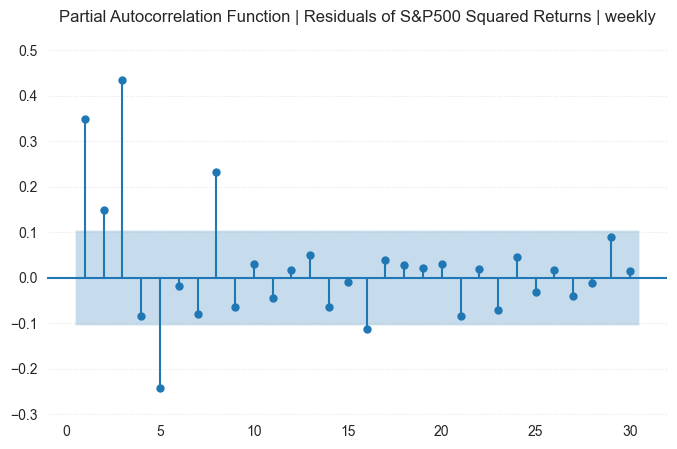

In [42]:
from statsmodels.graphics.tsaplots import plot_pacf

fig, ax = plt.subplots(figsize=(8, 5))
plot_pacf(a**2, auto_ylims = True, lags = range(1, 31), method = 'ywm', ax = ax)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls=':', alpha=0.5)
plt.title(r'Partial Autocorrelation Function | Residuals of S&P500 Squared Returns | weekly')
plt.show()

기각역을 유의하게 벗어나는 지점은 $m=3$ 지점이다. $a_t^2$에 대해 적절한 차수는 3가 된다

For the $\mathrm{ARCH}$ model, the input should be the return Series of the asset. The parameters should be set as follows

- `vol` : Selects the estimation method. Since the default is GARCH, specify ARCH for ARCH model estimation
- `p` : Order of volatility. Here we specify it as 3

In [43]:
import warnings
warnings.filterwarnings('ignore')

arch_model = arch.arch_model(ret, vol = 'ARCH', p = 3)
result = arch_model.fit()
print(result.summary())

Iteration:      1,   Func. Count:      7,   Neg. LLF: 153594001.99176112
Iteration:      2,   Func. Count:     20,   Neg. LLF: 410057.4339143195
Iteration:      3,   Func. Count:     27,   Neg. LLF: -783.1917453399376
Iteration:      4,   Func. Count:     35,   Neg. LLF: -743.9929301556712
Iteration:      5,   Func. Count:     42,   Neg. LLF: -799.6738075752979
Iteration:      6,   Func. Count:     49,   Neg. LLF: -805.8267499427525
Iteration:      7,   Func. Count:     56,   Neg. LLF: -832.0840420659872
Iteration:      8,   Func. Count:     63,   Neg. LLF: -832.2615919793049
Iteration:      9,   Func. Count:     70,   Neg. LLF: -823.4315797440529
Iteration:     10,   Func. Count:     78,   Neg. LLF: -833.1306759895883
Iteration:     11,   Func. Count:     84,   Neg. LLF: -833.1308125313453
Iteration:     12,   Func. Count:     89,   Neg. LLF: -833.1308125313892
Optimization terminated successfully    (Exit mode 0)
            Current function value: -833.1308125313453
            Iter

위 추정 결과를 해석하면 아래와 같다

$$r_t = 0.0041 + a_t$$
$$a_t = \sigma_t \epsilon_t$$
$$\sigma_t^2 = 0.00017 + 0.3575 a_{t-1}^2 + 0.2266 a_{t-2}^2 + 0.2838 a_{t-3}^2$$

#### Exercise 1
In this case, fit the model considering the ARCH model's volatility order as 1. What results do you get? Are the coefficients of the fitted model appropriate? What are the concerns when specifying a higher order?

In [ ]:
# Write your code here!